<a href="https://colab.research.google.com/github/abhay01kg/healthcare_supply_chain_analytics/blob/main/healthcare_supplyChain_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv('/content/healthcare_supply_chain_analysis/supply_chain_data.csv')

In [7]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [10]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [11]:
data.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


checking through each column for null/NaN values, there's no column as such

In [12]:
data.duplicated().any()

False

there's no duplicate row in the data

In [14]:
# calculating net profit

data['Net Profit'] = data['Revenue generated'] - (

    data['Manufacturing costs'] + data['Shipping costs'] + data['Costs'])

In [16]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Net Profit
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,8425.008266
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,6914.501143
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,9397.086845
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,7474.705957
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,1667.108811


### EDA, Exploratory Data Analysis

In [19]:
data["Cost Variability"] = data[["Manufacturing costs", "Shipping costs"]].std(axis=1)

# or each row in DataFrame,  calculated the standard deviation of the values
# in the "Manufacturing costs" and "Shipping costs" columns and stores the result
# in the "Cost Variability" column for that row.

fig= px.bar(

    data,

    x="SKU",

    y="Cost Variability",

    title="Cost Variability by SKU",

    labels={"Cost Variability": "Cost Variability (Manufacturing & Shipping)"},

    color="Cost Variability")

fig.show()

In [20]:
# Revenue generated by Product type

fig_bar = px.bar(data, x='Product type', y='Revenue generated',title="Revenue by Product Type ",

            labels={'Revenue generated': 'Revenue ($)', 'Product type': 'Product Type'},hover_data={'Number of products sold':True})

fig_bar.show()

In [24]:
# revernue generated by route

fig_type = px.bar(data, x='Revenue generated', y='Transportation modes',color='Transportation modes', title='Revenue generated by means of transportation', hover_data={'Routes': True} )

fig_type.show()

In [29]:
pie_chart = px.pie(data, values='Revenue generated', names='Customer demographics',

                   title='Revenue by Customer demographics',

                   hover_data=['Number of products sold'],

                   hole=0.5)

pie_chart.update_traces(textposition='outside', textinfo='value+label+percent')

pie_chart.show()

In [32]:
# Calculate mean defect rates by product type

defect_rates_by_product = data.groupby("Product type")['Defect rates'].mean().reset_index()

fig = px.bar(

    defect_rates_by_product,

    x='Product type',

    y='Defect rates',

    title='Defect Rates by Product Type',

    labels={'Defect rates': 'Mean Defect Rates'},

    color_discrete_sequence=px.colors.qualitative.Set3 )

fig.show()

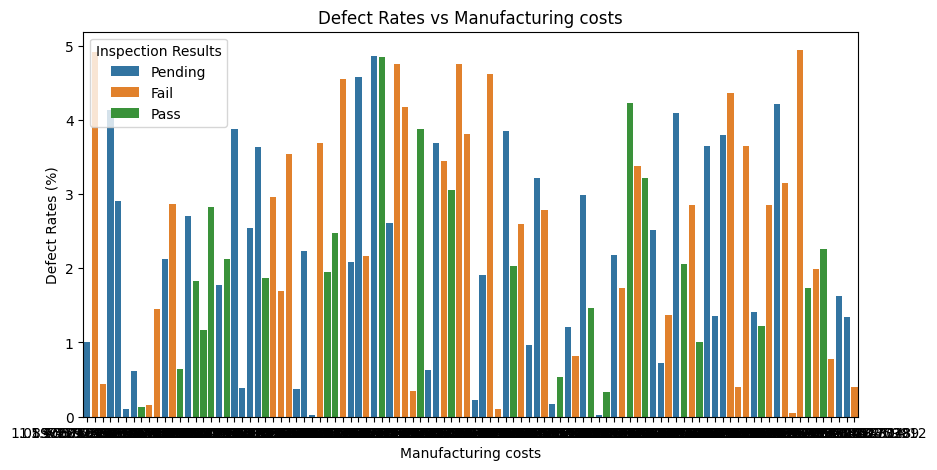

In [43]:


plt.figure(figsize=(10, 5))

sns.barplot(x="Manufacturing costs", y="Defect rates", hue="Inspection results", data=data)

plt.title("Defect Rates vs Manufacturing costs")

plt.xlabel("Manufacturing costs")

plt.ylabel("Defect Rates (%)")

plt.legend(title="Inspection Results")

plt.show()

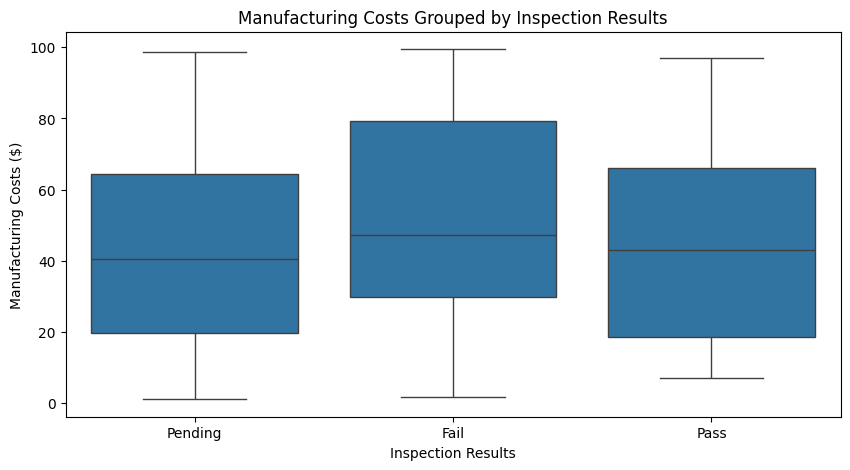

In [44]:
#Manufacturing Costs grouped by Inspection Results

plt.figure(figsize=(10, 5))

sns.boxplot(x="Inspection results", y="Manufacturing costs", data=data)

plt.title("Manufacturing Costs Grouped by Inspection Results")

plt.ylabel("Manufacturing Costs ($)")

plt.xlabel("Inspection Results")

plt.show()

In [49]:
#top 10 SKU by revenues in a bar chart


sku_revenue = data.groupby('SKU')['Revenue generated'].sum().reset_index()

sku_revenue_sorted = sku_revenue.sort_values(by='Revenue generated', ascending=False)

top_10_skus = sku_revenue_sorted.head(10)


fig = px.bar(
    top_10_skus,
    x='SKU',
    y='Revenue generated',
    title='Top 10 SKUs by Revenue',
    labels={'Revenue generated': 'Total Revenue($)', 'SKU': 'Stock Keeping Unit(SKU)'},
    text='Revenue generated'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.show()

In [50]:
stock_chart = px.line(data, x='SKU',

                      y='Stock levels',

                      title='Stock Levels by SKU')

stock_chart.show()

In [51]:
order_quantity_chart = px.bar(data, x='SKU',

                              y='Order quantities',

                              title='Order Quantity by SKU')

order_quantity_chart.show()


In [52]:
revenue_chart = px.line(data, x='SKU',

                        y='Revenue generated',

                        title='Revenue Generated by SKU')

revenue_chart.show()

In [54]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()

avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()

result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')

result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)


fig = px.bar(

    result,

    x='Product type',

    y=['Average Lead Time', 'Average Manufacturing Costs'],

    title="Comparison of Average Lead Time and Manufacturing Costs by Product Type",

    labels={

        "value": "Average Value",

        "Product type": "Product Type",

        "variable": "Metrics"

    },

    barmode='group'

)

fig.show()